In [122]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical

## 1. Charger le dataset CIFAR-10


In [123]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

## 2. Normalisation des valeurs de pixels

In [124]:
x_train, x_test = x_train / 255.0, x_test / 255.0

## 3. Affichage du Nombre d'Échantillons d'Entraînement

In [125]:
print(x_train.shape[0], 'train samples')

50000 train samples


##4. Affichage du Nombre d'Échantillons du Test

In [126]:
print(x_val.shape[0], 'test samples')

10000 test samples


## 5. Encodage One-Hot des Étiquettes

In [127]:
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

## 6. Définition du Modèle CNN

In [128]:
model = Sequential()

## 7. Ajout de Couches Convolutionnelles et de Pooling

In [129]:
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))

## 8. Ajout de Couches Entièrement Connectées

In [130]:
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

## 9. Compilation du Modèle

In [131]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## 10. Affichage du Résumé du Modèle

In [132]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_21 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_22 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 flatten_7 (Flatten)         (None, 1024)             

## 11. Entraînement du Modèle

In [133]:
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_split=0.2)


Epoch 1/10
625/625 [==============================] - 33s 51ms/step - loss: 1.8537 - accuracy: 0.3070 - val_loss: 1.5219 - val_accuracy: 0.4506
Epoch 2/10
625/625 [==============================] - 30s 47ms/step - loss: 1.5174 - accuracy: 0.4493 - val_loss: 1.3510 - val_accuracy: 0.5182
Epoch 3/10
625/625 [==============================] - 28s 44ms/step - loss: 1.3864 - accuracy: 0.5038 - val_loss: 1.2157 - val_accuracy: 0.5683
Epoch 4/10
625/625 [==============================] - 28s 45ms/step - loss: 1.2984 - accuracy: 0.5405 - val_loss: 1.1502 - val_accuracy: 0.5920
Epoch 5/10
625/625 [==============================] - 28s 45ms/step - loss: 1.2233 - accuracy: 0.5690 - val_loss: 1.1066 - val_accuracy: 0.6059
Epoch 6/10
625/625 [==============================] - 28s 45ms/step - loss: 1.1553 - accuracy: 0.5922 - val_loss: 1.0638 - val_accuracy: 0.6288
Epoch 7/10
625/625 [==============================] - 28s 44ms/step - loss: 1.0980 - accuracy: 0.6169 - val_loss: 0.9890 - val_accuracy:

## 12. Évaluation du Modèle sur l'Ensemble de Test

In [135]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc * 100:.2f}%')

313/313 [==============================] - 2s 7ms/step - loss: 0.9776 - accuracy: 0.6560
Test accuracy: 65.60%


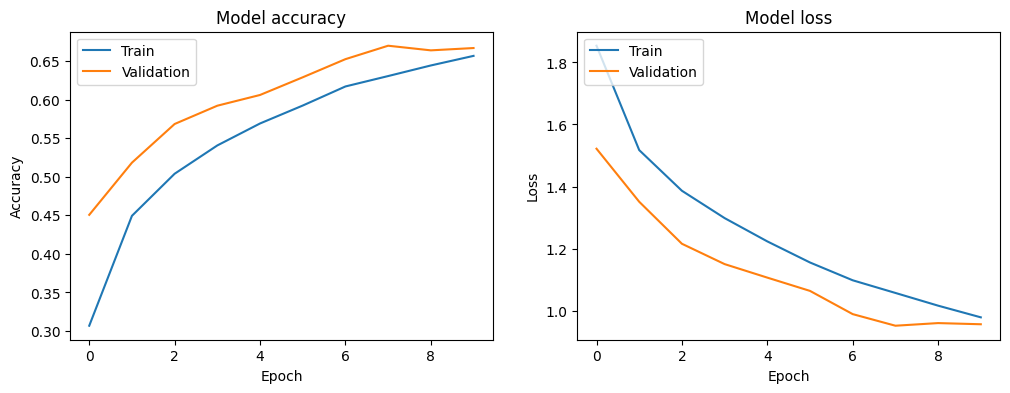

In [140]:
# Plot training history
plt.figure(figsize=(12, 4))
# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
